# ============================================
# 📊 PROJETO: Women Business and the Law Index
# Fonte: https://data360.worldbank.org/en/indicator/WB_WBL_SG_LAW_INDX
# Objetivo: Analisar a evolução da igualdade de gênero nas leis
# ============================================


# === 1. IMPORTAÇÕES ===

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Configuração visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# === 2. CARREGAR OS DADOS ORIGINAIS ===

In [25]:
df = pd.read_excel("data/wbl_raw.xlsx")

# === 3. INSPEÇÃO INICIAL ===

In [26]:
print("Colunas:", df.columns.tolist())
print(df[["REF_AREA_LABEL", "TIME_PERIOD", "OBS_VALUE"]].head())

Colunas: ['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA', 'REF_AREA_LABEL', 'INDICATOR', 'INDICATOR_LABEL', 'SEX', 'SEX_LABEL', 'AGE', 'AGE_LABEL', 'URBANISATION', 'URBANISATION_LABEL', 'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'COMP_BREAKDOWN_1', 'COMP_BREAKDOWN_1_LABEL', 'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL', 'COMP_BREAKDOWN_3', 'COMP_BREAKDOWN_3_LABEL', 'TIME_PERIOD', 'OBS_VALUE', 'DATABASE_ID', 'DATABASE_ID_LABEL', 'UNIT_MULT', 'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL', 'TIME_FORMAT', 'TIME_FORMAT_LABEL', 'COMMENT_OBS', 'OBS_STATUS', 'OBS_STATUS_LABEL', 'OBS_CONF', 'OBS_CONF_LABEL']
                REF_AREA_LABEL  TIME_PERIOD  OBS_VALUE
0                        Aruba         1970        NaN
1  Africa Eastern and Southern         1970        NaN
2                  Afghanistan         1970     2625.0
3   Africa Western and Central         1970        NaN
4                       Angola         1970    30625.0


# === 4. SELEÇÃO DAS COLUNAS IMPORTANTES ===

In [27]:
df_limpo = df[[
    "REF_AREA",              # Código do país
    "REF_AREA_LABEL",        # Nome do país
    "TIME_PERIOD",           # Ano
    "OBS_VALUE"              # Valor do índice
]].copy()

In [28]:
# Renomear colunas
df_limpo.columns = ["pais_codigo", "pais", "ano", "indice_wbl"]


# === 5. TRATAMENTO ===

In [29]:
# Remover valores ausentes
df_limpo.dropna(subset=["indice_wbl"], inplace=True)

In [30]:
# Garantir tipos corretos
df_limpo["ano"] = df_limpo["ano"].astype(int)
df_limpo["indice_wbl"] = pd.to_numeric(df_limpo["indice_wbl"], errors="coerce")

In [31]:
# Ordenar por país e ano
df_limpo.sort_values(by=["pais", "ano"], inplace=True)

# === 6. CRIAR NOVAS VARIÁVEIS ===

In [32]:
# Variação ano a ano por país
df_limpo["variacao_anual"] = df_limpo.groupby("pais")["indice_wbl"].diff()

In [33]:
# Crescimento percentual
df_limpo["crescimento_pct"] = df_limpo.groupby("pais")["indice_wbl"].pct_change() * 100

# === 7. EXPLORAÇÃO INICIAL ===

In [34]:
print("\nExemplo Brasil:")
print(df_limpo[df_limpo["pais"] == "Brazil"].tail())


Exemplo Brasil:
      pais_codigo    pais   ano  indice_wbl  variacao_anual  crescimento_pct
13014         BRA  Brazil  2019     81875.0             0.0         0.000000
13279         BRA  Brazil  2020       850.0        -81025.0       -98.961832
13544         BRA  Brazil  2021       850.0             0.0         0.000000
13809         BRA  Brazil  2022       850.0             0.0         0.000000
14074         BRA  Brazil  2023       850.0             0.0         0.000000


# === 8. EXPORTAÇÃO PARA USO NO POWER BI ===

In [35]:
df_limpo.to_csv("export/wbl_tratado.csv", index=False)
print("✅ CSV tratado exportado com sucesso para Power BI")

✅ CSV tratado exportado com sucesso para Power BI


# === 9. VISUALIZAÇÃO DE EXEMPLO ===

1. Ranking global dos países com maior índice (ano mais recente)

C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\3294645498.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="indice_wbl", y="pais", palette="viridis")
C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\3294645498.py:12: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\3294645498.py:13: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.savefig("images/top10_wbl_global.png")
C:\Users\02689045109.TOCANTINS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


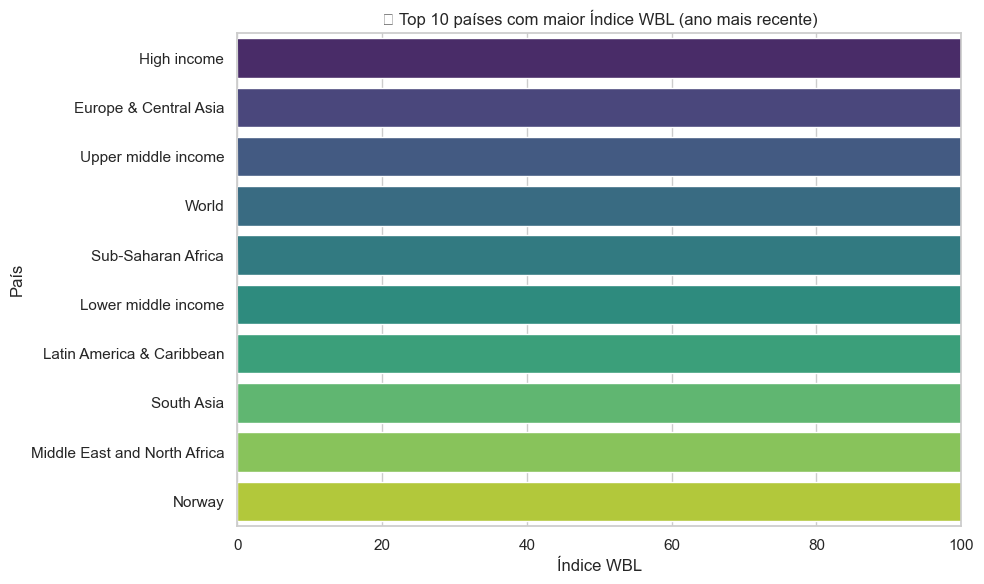

In [36]:
# Filtrar o último ano disponível por país
df_top = df_limpo.sort_values("ano").groupby("pais").last().reset_index()
top10 = df_top.sort_values("indice_wbl", ascending=False).head(10)

# Plotar
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x="indice_wbl", y="pais", palette="viridis")
plt.title("🌍 Top 10 países com maior Índice WBL (ano mais recente)")
plt.xlabel("Índice WBL")
plt.ylabel("País")
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig("images/top10_wbl_global.png")
plt.show()


 2. Evolução temporal do Brasil com crescimento percentual
 

C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\781449898.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.tight_layout()
C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\781449898.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig("images/evolucao_crescimento_brasil.png")
C:\Users\02689045109.TOCANTINS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


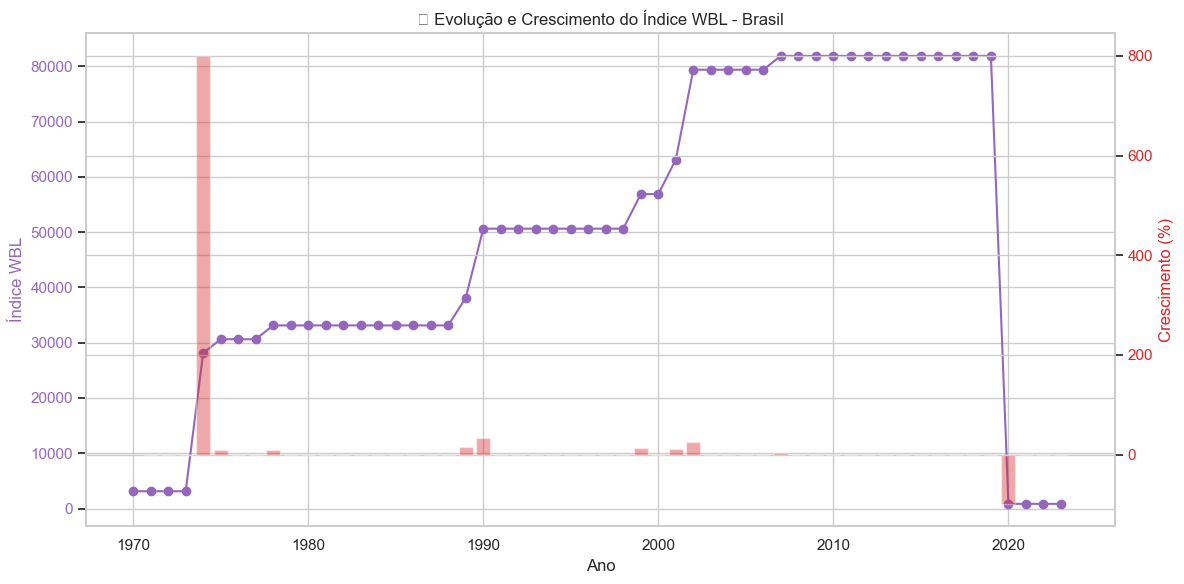

In [37]:
# Brasil com crescimento
df_brasil = df_limpo[df_limpo["pais"] == "Brazil"]

# Plot de linha com dois eixos
fig, ax1 = plt.subplots()

color = 'tab:purple'
ax1.set_xlabel("Ano")
ax1.set_ylabel("Índice WBL", color=color)
ax1.plot(df_brasil["ano"], df_brasil["indice_wbl"], marker='o', color=color, label="Índice")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Crescimento (%)", color=color)
ax2.bar(df_brasil["ano"], df_brasil["crescimento_pct"], alpha=0.4, color=color, label="Crescimento")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("📈 Evolução e Crescimento do Índice WBL - Brasil")
fig.tight_layout()
plt.savefig("images/evolucao_crescimento_brasil.png")
plt.show()

3. Mapa de calor com todos os países ao longo do tempo

C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\3887363102.py:10: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\3887363102.py:11: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.savefig("images/mapa_calor_wbl.png")
C:\Users\02689045109.TOCANTINS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


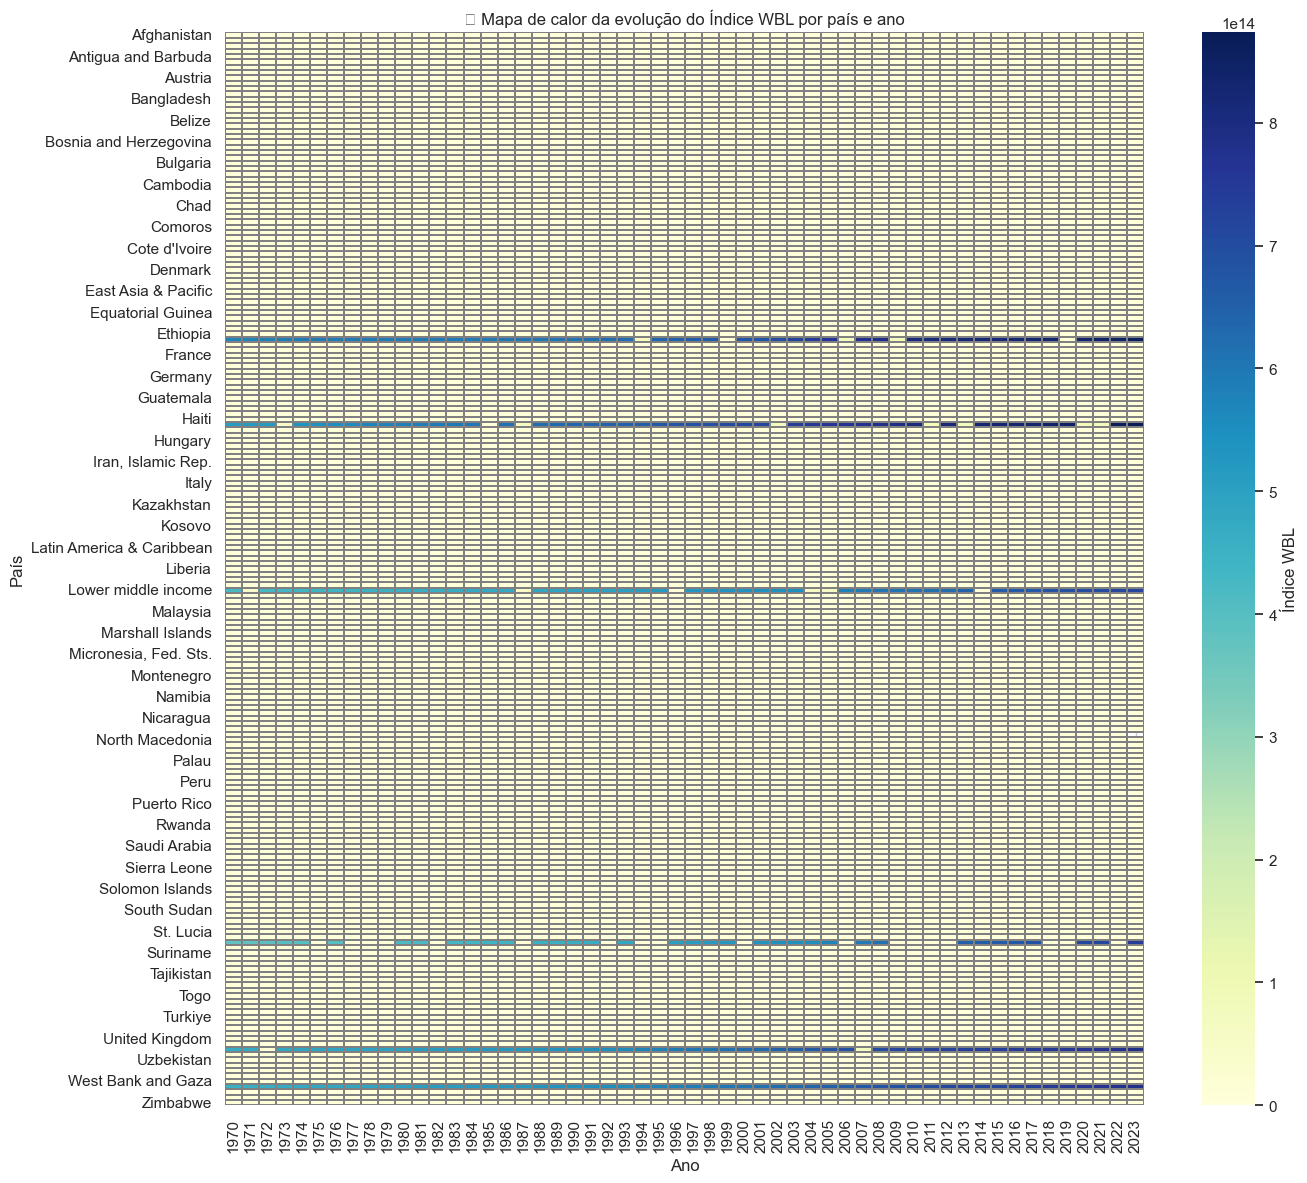

In [38]:
# Pivotar para heatmap
df_heat = df_limpo.pivot(index="pais", columns="ano", values="indice_wbl")
df_heat = df_heat.dropna(thresh=5)  # Remove países com poucos anos

plt.figure(figsize=(14, 12))
sns.heatmap(df_heat, cmap="YlGnBu", linewidths=0.3, linecolor="gray", cbar_kws={"label": "Índice WBL"})
plt.title("🌍 Mapa de calor da evolução do Índice WBL por país e ano")
plt.xlabel("Ano")
plt.ylabel("País")
plt.tight_layout()
plt.savefig("images/mapa_calor_wbl.png")
plt.show()

4. Distribuição geral do índice em todos os países (ano mais recente)

C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\4159239784.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\4159239784.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig("images/distribuicao_wbl.png")
C:\Users\02689045109.TOCANTINS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


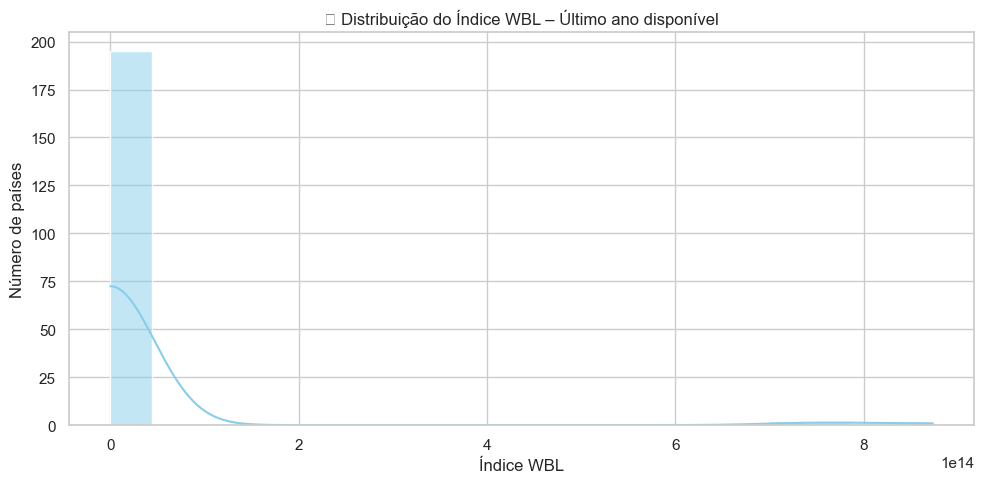

In [39]:
# Distribuição geral (último ano por país)
df_last = df_limpo.sort_values("ano").groupby("pais").last().reset_index()

plt.figure(figsize=(10, 5))
sns.histplot(df_last["indice_wbl"], bins=20, kde=True, color="skyblue")
plt.title("📊 Distribuição do Índice WBL – Último ano disponível")
plt.xlabel("Índice WBL")
plt.ylabel("Número de países")
plt.tight_layout()
plt.savefig("images/distribuicao_wbl.png")
plt.show()

5. Top países da América Latina em 2022

C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\407176457.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2022, x="indice_wbl", y="pais", palette="cubehelix")
C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\407176457.py:15: UserWarning: Glyph 127473 (\N{REGIONAL INDICATOR SYMBOL LETTER L}) missing from current font.
  plt.tight_layout()
C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\407176457.py:15: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()
C:\Users\02689045109.TOCANTINS\AppData\Local\Temp\ipykernel_18884\407176457.py:16: UserWarning: Glyph 127473 (\N{REGIONAL INDICATOR SYMBOL LETTER L}) missing from current font.
  plt.savefig("images/latam_wbl_2022.png")
C:\Users\02689045109.TOCANTINS\AppData\Loca

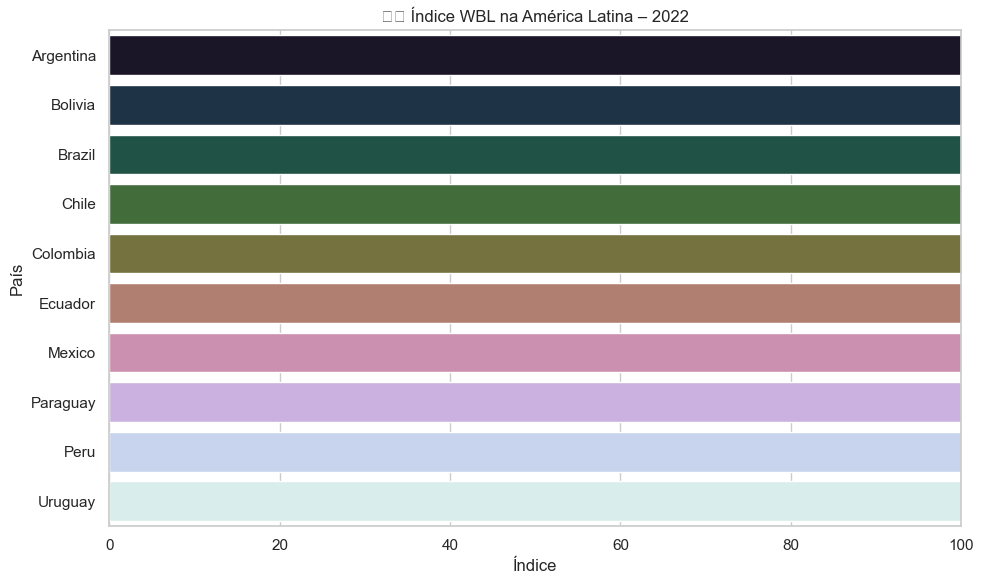

In [40]:
latam_paises = [
    "Brazil", "Argentina", "Chile", "Colombia", "Mexico",
    "Uruguay", "Paraguay", "Peru", "Bolivia", "Ecuador"
]

df_latam = df_limpo[df_limpo["pais"].isin(latam_paises)]
df_2022 = df_latam[df_latam["ano"] == 2022]

plt.figure(figsize=(10,6))
sns.barplot(data=df_2022, x="indice_wbl", y="pais", palette="cubehelix")
plt.title("🇱🇺 Índice WBL na América Latina – 2022")
plt.xlabel("Índice")
plt.ylabel("País")
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig("images/latam_wbl_2022.png")
plt.show()
